In [6]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

In [7]:
hotelReviews = pd.read_csv('C:\Users\deniz\Documents\Hotel_Reviews.csv')
hotel_info = hotelReviews[['Hotel_Name', 'Hotel_Address']]
hotel_info = hotel_info.drop_duplicates()

# By Manual Analysis, we found that hotels from only these cities and nationalities are represented in the dataset

In [13]:
cities = ['Paris', 'Amsterdam', 'London', 'Milan', 'Barcelona', 'Vienna']
countries = ['France', 'Netherlands', 'United Kingdom', 'Italy', 'Spain', 'Austria']

# Extraction of City and Nation of Hotels and appending them to the dataset for ease of access

In [14]:
Country = []
City = []

for a in hotel_info['Hotel_Address']:
    for c_i in range(len(countries)):
        if countries[c_i] in a:
            Country.append(countries[c_i])
            City.append(cities[c_i])        
hotel_info['Country'] = Country
hotel_info['City'] = City

hotel_info.to_csv('C:\Users\deniz\Documents\Hotel_Info_Country_City.csv')

citiesDict = dict()
countriesDict = dict()

i = 0
for hn in hotel_info['Hotel_Name']:
    citiesDict[hn] = City[i]
    countriesDict[hn] = Country[i]
    i += 1
    
hnCities = []
hnCountries = []
for hName in hotelReviews['Hotel_Name']:
    hnCities.append(citiesDict[hName])
    hnCountries.append(countriesDict[hName])
hotelReviews['Country'] = hnCountries
hotelReviews['City'] = hnCities

hotelReviews.to_csv('C:\Users\deniz\Documents\HotelReviewsCountryCity.csv')

# Analysis of Bad, Average, Good and Excellent Reviews By City

In [15]:
hotRevs = hotelReviews[['Hotel_Name', 'City', 'Reviewer_Score', 'Reviewer_Nationality']]
# 0-4: Bad          0
# 4-6: Average      0
# 6-8: Good         0
# 9-10: Excellent   0
reviews = hotRevs['Reviewer_Score']
binRevs = []
for r in reviews:
    if 0.0 < r <= 4:
        binRevs.append(0)
    elif 4 < r <= 6:
        binRevs.append(1)
    elif 6 < r <= 8:
        binRevs.append(2)
    elif 8 < r <= 10.0:
        binRevs.append(3)
hotRevs['Review_Labels'] = binRevs

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
def reviewDistbyCity(cities, hotRevs, nation = ''):
    print cities
    ctyDF = pd.DataFrame(index=cities, columns=['Bad', 'Average','Good', 'Excellent'])

    for c in cities:
        if nation is '':
            c_Mat = hotRevs.loc[hotRevs['City'] == c]
        else:
            c_Mat = hotRevs.loc[(hotRevs['City'] == c)].loc[hotRevs['Reviewer_Nationality'] == nation]
        
        rArr = np.array(c_Mat['Review_Labels'])
        badR = 1.0 * sum(rArr == 0)
        avgR = 1.0 * sum(rArr == 1)
        goodR = 1.0 * sum(rArr == 2)
        excR = 1.0 * sum(rArr  == 3)

        #binRevs = [ np.round(10000 * badR / rArr.shape[0]) / 100, 
        #            np.round(10000 * avgR / rArr.shape[0]) / 100,
        #            np.round(10000 * goodR / rArr.shape[0]) / 100,
        #            np.round(10000 * excR / rArr.shape[0]) / 100]

        binRevs = [ np.round(100 * badR / rArr.shape[0]),
                    np.round(100 * avgR / rArr.shape[0]),
                    np.round(100 * goodR / rArr.shape[0]),
                    np.round(100 * excR / rArr.shape[0])]


        ctyDF['Bad'][c] = binRevs[0]
        ctyDF['Average'][c] = binRevs[1]
        ctyDF['Good'][c] = binRevs[2]
        ctyDF['Excellent'][c] = binRevs[3]

    fig_size = plt.rcParams["figure.figsize"]
 
    fig_size[0] = 15
    fig_size[1] = 15
    ctyDF.plot.bar()
    
    figName = 'City by Percentage of Reviews'
    if nation is not '':
        figName = figName + ' by '+nation+'Nationales'
    plt.title('Distribution of Reviews by City')
    plt.savefig(figName)
    plt.show()

['Paris', 'Amsterdam', 'London', 'Milan', 'Barcelona', 'Vienna']


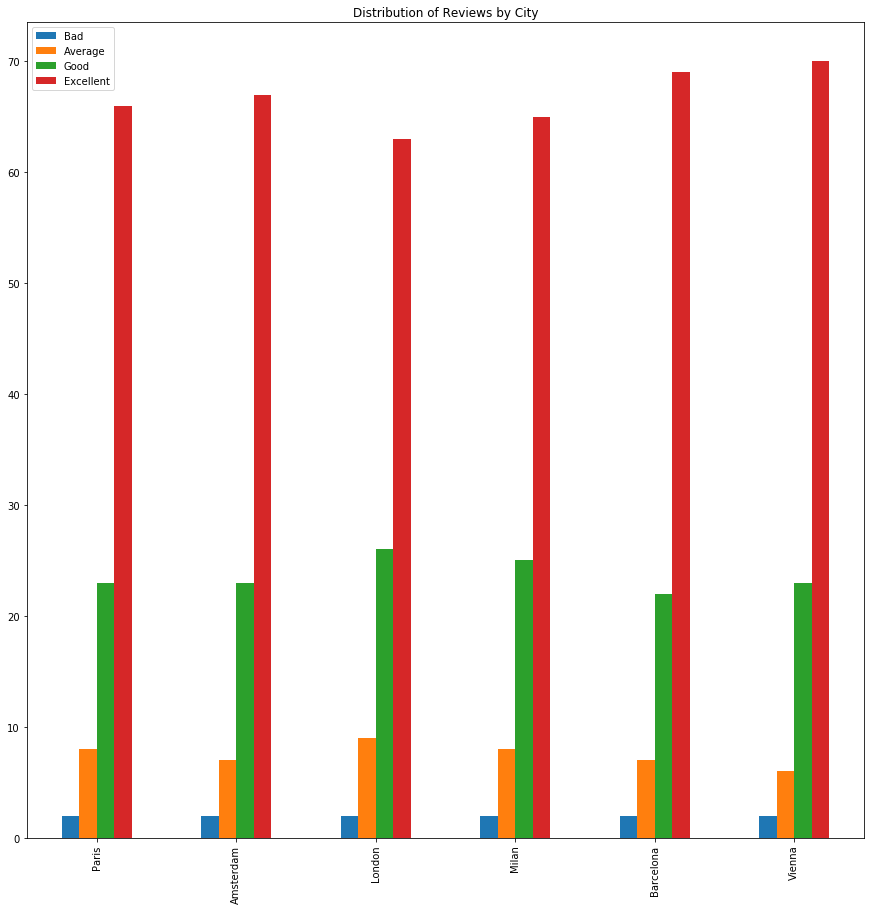

In [20]:
reviewDistbyCity(cities, hotRevs, nation='')

# Average score of Hotels or Cities or Nations by Reviewer Nationality

In [21]:
def plotRelat(hotelReviews, Type = 'Hotel_Name', Nationality = ' United Kingdom ', Threshold = 100):

    df = hotelReviews[[Type, 'Reviewer_Nationality', 'Reviewer_Score']]
    df = df.loc[df['Reviewer_Nationality'] == Nationality]

    relatNames = list(set(df[Type]))

    print 'Review Data'
    reviewData = []
    for rn in relatNames:
        ratings = np.array(df.loc[df[Type] == rn]['Reviewer_Score'])
        if ratings.shape[0] >= Threshold:
            reviewData.append([rn, np.mean(ratings), np.std(ratings), ratings.shape[0]])
    
    print 'Relative Names and Reviews'
    relNames = []
    relRevs = []
    relStds = []
    for i in reversed(sorted(reviewData, key=itemgetter(1))):
        relNames.append(i[0])
        relRevs.append(i[1])
        relStds.append(i[2])
    
    print 'Plotting'
    
    objects = relNames
    y_pos = np.arange(len(relNames))
    performance = relRevs

    fig_size = plt.rcParams["figure.figsize"]
 
    fig_size[0] = 15
    fig_size[1] = 7

    plt.ylim([0,11])
    plt.bar(y_pos, performance, align='center', alpha=0.5, yerr = relStds)
    plt.xticks(y_pos, objects)
    plt.ylabel('Mean Reviews')
    plt.title('Reviews of'+Nationality+' Nationales by '+Type)

    plt.savefig('Reviews of'+Nationality+' Nationales by '+Type)
    plt.clf()
    #plt.show()

# Analysis of Cities and Nations by Reviewer Nationalities

In [22]:
Nats = [' United Kingdom ', ' United States of America ', ' Australia ', ' Ireland ']

for n in Nats:
    #plotRelat(hotelReviews, Type = 'Country', Nationality=n, Threshold=0)
    plotRelat(hotelReviews, Type = 'City', Nationality=n, Threshold=0)

Review Data
Relative Names and Reviews
Plotting
Review Data
Relative Names and Reviews
Plotting
Review Data
Relative Names and Reviews
Plotting
Review Data
Relative Names and Reviews
Plotting


# Average Rating of Hotels From Each City

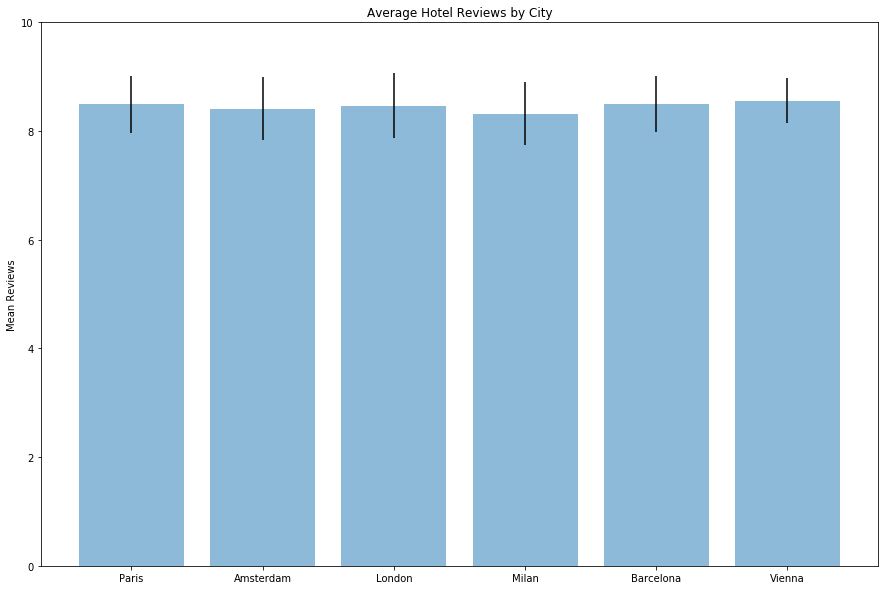

In [24]:
cityMeans = []
cityStds = []
for c in cities:
    hrc = hotelReviews.loc[hotelReviews['City'] == c][['Hotel_Name','Average_Score']]
    hrc = hrc.drop_duplicates()
    cityMeans.append(np.mean(hrc['Average_Score']))
    cityStds.append(np.std(hrc['Average_Score']))
    
fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 15
fig_size[1] = 10

objects = cities
y_pos = np.arange(len(cities))
performance = cityMeans

plt.ylim([0,10])
plt.bar(y_pos, performance, align='center', alpha=0.5, yerr=cityStds)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Reviews')
plt.title('Average Hotel Reviews by City')
plt.savefig('Average Hotel Reviews by City')
plt.show()

In [ ]:
cntMeans = []
for c in allCountries:
    hrc = hotelReviews.loc[hotelReviews['Country'] == c][['Hotel_Name','Average_Score']]
    hrc = hrc.drop_duplicates()
    cntMeans.append(np.mean(hrc['Average_Score']))

fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 12
fig_size[1] = 12

objects = allCountries
y_pos = np.arange(len(allCountries))
performance = cntMeans

plt.ylim([0,10])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Reviews')
plt.title('Average Hotel Reviews by Country')
plt.savefig('Average Hotel Reviews by Country')
plt.show()